In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, cross_val_score
from sklearn.preprocessing import KBinsDiscretizer, OneHotEncoder, StandardScaler
from sklearn.naive_bayes import ComplementNB, BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score
from sklearn.metrics import classification_report, RocCurveDisplay, ConfusionMatrixDisplay
from scipy import stats
from sklearn.base import clone
# %matplotlib inline

import lightgbm as lgb

from sklearn.model_selection import train_test_split

from sklearn.impute import SimpleImputer

from sklearn.metrics import mean_squared_error

from sklearn.preprocessing import LabelEncoder

from datetime import datetime



/usr/local/lib/python3.11/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Article_EV/ev_charging_patterns.csv')
df

,User ID,Vehicle Model,Battery Capacity (kWh),Charging Station ID,Charging Station Location,Charging Start Time,Charging End Time,Energy Consumed (kWh),Charging Duration (hours),Charging Rate (kW),Charging Cost (USD),Time of Day,Day of Week,State of Charge (Start %),State of Charge (End %),Distance Driven (since last charge) (km),Temperature (°C),Vehicle Age (years),Charger Type,User Type
0,User_1,BMW i3,108.463007,Station_391,Houston,2024-01-01 00:00:00,2024-01-01 00:39:00,60.712346,0.591363,36.389181,13.087717,Evening,Tuesday,29.371576,86.119962,293.602111,27.947953,2.0,DC Fast Charger,Commuter
1,User_2,Hyundai Kona,100.000000,Station_428,San Francisco,2024-01-01 01:00:00,2024-01-01 03:01:00,12.339275,3.133652,30.677735,21.128448,Morning,Monday,10.115778,84.664344,112.112804,14.311026,3.0,Level 1,Casual Driver
2,User_3,Chevy Bolt,75.000000,Station_181,San Francisco,2024-01-01 02:00:00,2024-01-01 04:48:00,19.128876,2.452653,27.513593,35.667270,Morning,Thursday,6.854604,69.917615,71.799253,21.002002,2.0,Level 2,Commuter
3,User_4,Hyundai Kona,50.000000,Station_327,Houston,2024-01-01 03:00:00,2024-01-01 06:42:00,79.457824,1.266431,32.882870,13.036239,Evening,Saturday,83.120003,99.624328,199.577785,38.316313,1.0,Level 1,Long-Distance Traveler
4,User_5,Hyundai Kona,50.000000,Station_108,Los Angeles,2024-01-01 04:00:00,2024-01-01 05:46:00,19.629104,2.019765,10.215712,10.161471,Morning,Saturday,54.258950,63.743786,203.661847,-7.834199,1.0,Level 1,Long-Distance Traveler
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1315,User_1316,Nissan Leaf,100.000000,Station_57,New York,2024-02-24 19:00:00,2024-02-24 20:30:00,42.011654,1.426444,5.895475,22.081164,Evening,Sunday,39.204102,83.915952,239.601075,1.919655,7.0,DC Fast Charger,Commuter
1316,User_1317,BMW i3,100.000000,Station_40,New York,2024-02-24 20:00:00,2024-02-24 20:44:00,68.185853,3.238212,18.388012,5.067806,Evening,Tuesday,31.456375,93.096461,164.376022,34.029775,4.0,Level 2,Casual Driver
1317,User_1318,Nissan Leaf,100.000000,Station_374,New York,2024-02-24 21:00:00,2024-02-24 23:03:00,18.895102,3.267122,45.482066,37.255002,Evening,Tuesday,71.903081,78.678879,226.519258,20.358761,5.0,DC Fast Charger,Commuter
1318,User_1319,Chevy Bolt,85.000000,Station_336,San Francisco,2024-02-24 22:00:00,2024-02-24 23:20:00,13.756252,2.754527,38.148183,39.046146,Afternoon,Sunday,76.187997,65.926573,291.494076,24.134598,5.0,Level 2,Commuter


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1320 entries, 0 to 1319
Data columns (total 20 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   User ID                                   1320 non-null   object 
 1   Vehicle Model                             1320 non-null   object 
 2   Battery Capacity (kWh)                    1320 non-null   float64
 3   Charging Station ID                       1320 non-null   object 
 4   Charging Station Location                 1320 non-null   object 
 5   Charging Start Time                       1320 non-null   object 
 6   Charging End Time                         1320 non-null   object 
 7   Energy Consumed (kWh)                     1254 non-null   float64
 8   Charging Duration (hours)                 1320 non-null   float64
 9   Charging Rate (kW)                        1254 non-null   float64
 10  Charging Cost (USD)                 

In [ ]:
unique_values = df['Vehicle Model'].unique()
unique_values

array(['BMW i3', 'Hyundai Kona', 'Chevy Bolt', 'Nissan Leaf',
       'Tesla Model 3'], dtype=object)

In [ ]:
unique_values = df['Battery Capacity (kWh)'].unique()
unique_values

array([108.46300741, 100.        ,  75.        ,  50.        ,
        85.        ,  62.        ,  97.68181223,  79.79920376,
        48.79648264,  76.87610038,  69.88407425, 124.31591139,
        59.83272651,  48.05069473,  24.59992215,  77.29894529,
        95.15365777, 147.39535434,  63.09631665,  93.27378067,
        48.46959856,  93.09486955,  50.87061708,  58.0121307 ,
       102.94949428,  95.69778087, 102.83943001,  89.03206383,
        81.65318205,  46.5379115 ,  27.03325783, 120.51063277,
        94.82402915,  45.38021848, 143.47520974,  10.18928677,
        78.38373536,  65.04709891,  33.37702357,  59.79413925,
         6.16889584,  45.62653203,  77.60847805,  48.63693125,
        60.78928025,  71.64548707,  46.87679655,  69.44504561,
         3.9765965 ,   1.53280653,  67.54202075, 127.28027404,
       107.43195455,  52.33224826,  39.29742253, 129.52415942,
         3.83851807,  78.84320421, 104.91720077,  51.40198312,
        99.53686937, 174.40966769,  54.37091028,  87.48

In [ ]:
# Model başına sabit batarya kapasitelerini içeren harita
battery_capacity_map = {
    "BMW i3": 42.2,
    "Hyundai Kona": 50.0,
    "Chevy Bolt": 65.0,
    "Nissan Leaf": 40.0,
    "Tesla Model 3": 66.0
}

# Batarya kapasitesini güncellemek için map işlemi
df["Battery Capacity (kWh)"] = df["Vehicle Model"].map(battery_capacity_map)

# Güncellenmiş veri setini kontrol etme
df.head()

,User ID,Vehicle Model,Battery Capacity (kWh),Charging Station ID,Charging Station Location,Charging Start Time,Charging End Time,Energy Consumed (kWh),Charging Duration (hours),Charging Rate (kW),Charging Cost (USD),Time of Day,Day of Week,State of Charge (Start %),State of Charge (End %),Distance Driven (since last charge) (km),Temperature (°C),Vehicle Age (years),Charger Type,User Type
0,User_1,BMW i3,42.2,Station_391,Houston,2024-01-01 00:00:00,2024-01-01 00:39:00,60.712346,0.591363,36.389181,13.087717,Evening,Tuesday,29.371576,86.119962,293.602111,27.947953,2.0,DC Fast Charger,Commuter
1,User_2,Hyundai Kona,50.0,Station_428,San Francisco,2024-01-01 01:00:00,2024-01-01 03:01:00,12.339275,3.133652,30.677735,21.128448,Morning,Monday,10.115778,84.664344,112.112804,14.311026,3.0,Level 1,Casual Driver
2,User_3,Chevy Bolt,65.0,Station_181,San Francisco,2024-01-01 02:00:00,2024-01-01 04:48:00,19.128876,2.452653,27.513593,35.667270,Morning,Thursday,6.854604,69.917615,71.799253,21.002002,2.0,Level 2,Commuter
3,User_4,Hyundai Kona,50.0,Station_327,Houston,2024-01-01 03:00:00,2024-01-01 06:42:00,79.457824,1.266431,32.882870,13.036239,Evening,Saturday,83.120003,99.624328,199.577785,38.316313,1.0,Level 1,Long-Distance Traveler
4,User_5,Hyundai Kona,50.0,Station_108,Los Angeles,2024-01-01 04:00:00,2024-01-01 05:46:00,19.629104,2.019765,10.215712,10.161471,Morning,Saturday,54.258950,63.743786,203.661847,-7.834199,1.0,Level 1,Long-Distance Traveler


In [ ]:
unique_values = df['Battery Capacity (kWh)'].unique()
unique_values

array([42.2, 50. , 65. , 40. , 66. ])

In [ ]:
df.head()

,User ID,Vehicle Model,Battery Capacity (kWh),Charging Station ID,Charging Station Location,Charging Start Time,Charging End Time,Energy Consumed (kWh),Charging Duration (hours),Charging Rate (kW),Charging Cost (USD),Time of Day,Day of Week,State of Charge (Start %),State of Charge (End %),Distance Driven (since last charge) (km),Temperature (°C),Vehicle Age (years),Charger Type,User Type
0,User_1,BMW i3,42.2,Station_391,Houston,2024-01-01 00:00:00,2024-01-01 00:39:00,60.712346,0.591363,36.389181,13.087717,Evening,Tuesday,29.371576,86.119962,293.602111,27.947953,2.0,DC Fast Charger,Commuter
1,User_2,Hyundai Kona,50.0,Station_428,San Francisco,2024-01-01 01:00:00,2024-01-01 03:01:00,12.339275,3.133652,30.677735,21.128448,Morning,Monday,10.115778,84.664344,112.112804,14.311026,3.0,Level 1,Casual Driver
2,User_3,Chevy Bolt,65.0,Station_181,San Francisco,2024-01-01 02:00:00,2024-01-01 04:48:00,19.128876,2.452653,27.513593,35.667270,Morning,Thursday,6.854604,69.917615,71.799253,21.002002,2.0,Level 2,Commuter
3,User_4,Hyundai Kona,50.0,Station_327,Houston,2024-01-01 03:00:00,2024-01-01 06:42:00,79.457824,1.266431,32.882870,13.036239,Evening,Saturday,83.120003,99.624328,199.577785,38.316313,1.0,Level 1,Long-Distance Traveler
4,User_5,Hyundai Kona,50.0,Station_108,Los Angeles,2024-01-01 04:00:00,2024-01-01 05:46:00,19.629104,2.019765,10.215712,10.161471,Morning,Saturday,54.258950,63.743786,203.661847,-7.834199,1.0,Level 1,Long-Distance Traveler


In [ ]:
# Convert 'Charging Start Time' column to datetime objects for easier manipulation

df["Charging Start Time"] = pd.to_datetime(df["Charging Start Time"])

In [ ]:
# Convert 'Charging End Time' column to datetime objects

df["Charging End Time"] = pd.to_datetime(df["Charging End Time"])


In [ ]:
# Extract the hour (0-23) when the charging session started

df["Hour"] = df["Charging Start Time"].dt.hour

In [ ]:
# Extract the month (1-12) when the charging session started

df["Month"] = df["Charging Start Time"].dt.month

In [ ]:
# Extract the year when the charging session started

df["Year"] = df["Charging Start Time"].dt.year

In [ ]:
# Step 3: Add Charging Duration Feature

# ---------------------------------------------------



# Calculate the duration of each charging session in hours

# This is done by subtracting 'Charging Start Time' from 'Charging End Time'

# The result is converted from seconds to hours

df["Charging Duration"] = (

    df["Charging End Time"] - df["Charging Start Time"]

).dt.total_seconds() / 3600

In [ ]:
# Step 4: Add Charging Rate Feature

# ---------------------------------------------------



# Calculate the average charging rate (kW) for each session

# Charging Rate = Energy Consumed (kWh) / Charging Duration (hours)

df["Charging Rate (kW)"] = df["Energy Consumed (kWh)"] / df["Charging Duration"]

In [ ]:
# Create new features by interacting existing features to capture combined effects



# Interaction between Charging Duration and Hour

df["Duration_Hour"] = df["Charging Duration"] * df["Hour"]



# Interaction between Charging Duration and Charging Rate

df["Duration_Rate"] = df["Charging Duration"] * df["Charging Rate (kW)"]



# Interaction between Hour and Charging Rate

df["Hour_Rate"] = df["Hour"] * df["Charging Rate (kW)"]


In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 500)

warnings.simplefilter(action='ignore', category=Warning)
df.head()

,User ID,Vehicle Model,Battery Capacity (kWh),Charging Station ID,Charging Station Location,Charging Start Time,Charging End Time,Energy Consumed (kWh),Charging Duration (hours),Charging Rate (kW),Charging Cost (USD),Time of Day,Day of Week,State of Charge (Start %),State of Charge (End %),Distance Driven (since last charge) (km),Temperature (°C),Vehicle Age (years),Charger Type,User Type,Hour,Month,Year,Charging Duration,Duration_Hour,Duration_Rate,Hour_Rate
0,User_1,BMW i3,42.2,Station_391,Houston,2024-01-01 00:00:00,2024-01-01 00:39:00,60.712346,0.591363,93.403609,13.087717,Evening,Tuesday,29.371576,86.119962,293.602111,27.947953,2.0,DC Fast Charger,Commuter,0,1,2024,0.650000,0.000000,60.712346,0.000000
1,User_2,Hyundai Kona,50.0,Station_428,San Francisco,2024-01-01 01:00:00,2024-01-01 03:01:00,12.339275,3.133652,6.118649,21.128448,Morning,Monday,10.115778,84.664344,112.112804,14.311026,3.0,Level 1,Casual Driver,1,1,2024,2.016667,2.016667,12.339275,6.118649
2,User_3,Chevy Bolt,65.0,Station_181,San Francisco,2024-01-01 02:00:00,2024-01-01 04:48:00,19.128876,2.452653,6.831741,35.667270,Morning,Thursday,6.854604,69.917615,71.799253,21.002002,2.0,Level 2,Commuter,2,1,2024,2.800000,5.600000,19.128876,13.663483
3,User_4,Hyundai Kona,50.0,Station_327,Houston,2024-01-01 03:00:00,2024-01-01 06:42:00,79.457824,1.266431,21.475088,13.036239,Evening,Saturday,83.120003,99.624328,199.577785,38.316313,1.0,Level 1,Long-Distance Traveler,3,1,2024,3.700000,11.100000,79.457824,64.425263
4,User_5,Hyundai Kona,50.0,Station_108,Los Angeles,2024-01-01 04:00:00,2024-01-01 05:46:00,19.629104,2.019765,11.110814,10.161471,Morning,Saturday,54.258950,63.743786,203.661847,-7.834199,1.0,Level 1,Long-Distance Traveler,4,1,2024,1.766667,7.066667,19.629104,44.443255


In [ ]:
# Identify numerical columns by selecting columns with float data types

numerical_columns = df.select_dtypes(include=["float64"]).columns



# Initialize a SimpleImputer to fill missing values with the median of each column

imputer = SimpleImputer(strategy="median")



# Apply the imputer to the numerical columns

df[numerical_columns] = imputer.fit_transform(df[numerical_columns])


In [ ]:
df.head()

,User ID,Vehicle Model,Battery Capacity (kWh),Charging Station ID,Charging Station Location,Charging Start Time,Charging End Time,Energy Consumed (kWh),Charging Duration (hours),Charging Rate (kW),Charging Cost (USD),Time of Day,Day of Week,State of Charge (Start %),State of Charge (End %),Distance Driven (since last charge) (km),Temperature (°C),Vehicle Age (years),Charger Type,User Type,Hour,Month,Year,Charging Duration,Duration_Hour,Duration_Rate,Hour_Rate
0,User_1,BMW i3,42.2,Station_391,Houston,2024-01-01 00:00:00,2024-01-01 00:39:00,60.712346,0.591363,93.403609,13.087717,Evening,Tuesday,29.371576,86.119962,293.602111,27.947953,2.0,DC Fast Charger,Commuter,0,1,2024,0.650000,0.000000,60.712346,0.000000
1,User_2,Hyundai Kona,50.0,Station_428,San Francisco,2024-01-01 01:00:00,2024-01-01 03:01:00,12.339275,3.133652,6.118649,21.128448,Morning,Monday,10.115778,84.664344,112.112804,14.311026,3.0,Level 1,Casual Driver,1,1,2024,2.016667,2.016667,12.339275,6.118649
2,User_3,Chevy Bolt,65.0,Station_181,San Francisco,2024-01-01 02:00:00,2024-01-01 04:48:00,19.128876,2.452653,6.831741,35.667270,Morning,Thursday,6.854604,69.917615,71.799253,21.002002,2.0,Level 2,Commuter,2,1,2024,2.800000,5.600000,19.128876,13.663483
3,User_4,Hyundai Kona,50.0,Station_327,Houston,2024-01-01 03:00:00,2024-01-01 06:42:00,79.457824,1.266431,21.475088,13.036239,Evening,Saturday,83.120003,99.624328,199.577785,38.316313,1.0,Level 1,Long-Distance Traveler,3,1,2024,3.700000,11.100000,79.457824,64.425263
4,User_5,Hyundai Kona,50.0,Station_108,Los Angeles,2024-01-01 04:00:00,2024-01-01 05:46:00,19.629104,2.019765,11.110814,10.161471,Morning,Saturday,54.258950,63.743786,203.661847,-7.834199,1.0,Level 1,Long-Distance Traveler,4,1,2024,1.766667,7.066667,19.629104,44.443255


In [ ]:


# Replace Infinite Values with Median---------------------------------------------------



# Iterate over each numerical column to replace infinite values

for col in numerical_columns:

    # Calculate the median value of the column

    median_val = df[col].median()



    # Replace positive and negative infinite values with the median

    df[col] = df[col].replace([np.inf, -np.inf], median_val)


In [ ]:
# Step 8: Encode Categorical Columns

# ---------------------------------------------------



# List of categorical columns that need to be label encoded

categorical_columns = [

    "Charger Type",

    "Charging Station ID",

    "Charging Station Location",

    "Day of Week",

    "Time of Day",

    "User ID",

    "User Type",

    "Vehicle Model",

]

In [ ]:
# Initialize a dictionary to store LabelEncoders for each categorical column

label_encoders = {}



# Iterate over each categorical column to apply label encoding

for col in categorical_columns:

    # Initialize a LabelEncoder for the current column

    label_encoders[col] = LabelEncoder()



    # Fit the LabelEncoder on the column data and transform it

    df[col] = label_encoders[col].fit_transform(df[col])

In [ ]:
df.head()

,User ID,Vehicle Model,Battery Capacity (kWh),Charging Station ID,Charging Station Location,Charging Start Time,Charging End Time,Energy Consumed (kWh),Charging Duration (hours),Charging Rate (kW),Charging Cost (USD),Time of Day,Day of Week,State of Charge (Start %),State of Charge (End %),Distance Driven (since last charge) (km),Temperature (°C),Vehicle Age (years),Charger Type,User Type,Hour,Month,Year,Charging Duration,Duration_Hour,Duration_Rate,Hour_Rate
0,0,0,42.2,301,1,2024-01-01 00:00:00,2024-01-01 00:39:00,60.712346,0.591363,93.403609,13.087717,1,5,29.371576,86.119962,293.602111,27.947953,2.0,0,1,0,1,2024,0.650000,0.000000,60.712346,0.000000
1,432,2,50.0,339,4,2024-01-01 01:00:00,2024-01-01 03:01:00,12.339275,3.133652,6.118649,21.128448,2,1,10.115778,84.664344,112.112804,14.311026,3.0,1,0,1,1,2024,2.016667,2.016667,12.339275,6.118649
2,543,1,65.0,83,4,2024-01-01 02:00:00,2024-01-01 04:48:00,19.128876,2.452653,6.831741,35.667270,2,4,6.854604,69.917615,71.799253,21.002002,2.0,2,1,2,1,2024,2.800000,5.600000,19.128876,13.663483
3,654,2,50.0,232,1,2024-01-01 03:00:00,2024-01-01 06:42:00,79.457824,1.266431,21.475088,13.036239,1,2,83.120003,99.624328,199.577785,38.316313,1.0,1,2,3,1,2024,3.700000,11.100000,79.457824,64.425263
4,765,2,50.0,9,2,2024-01-01 04:00:00,2024-01-01 05:46:00,19.629104,2.019765,11.110814,10.161471,2,2,54.258950,63.743786,203.661847,-7.834199,1.0,1,2,4,1,2024,1.766667,7.066667,19.629104,44.443255


In [ ]:
# ---------------------------------------------------

# Step 9: Prepare Features and Target Variable

# ---------------------------------------------------



# Define the list of features by excluding target and irrelevant columns

# Exclude 'Energy Consumed (kWh)', 'Charging End Time', and 'Charging Start Time' as they are not used for prediction

features = [

    col

    for col in df.columns

    if col not in ["Energy Consumed (kWh)", "Charging End Time", "Charging Start Time"]

]

In [ ]:
# Assign features to X and target variable to y

X = df[features]

y = df["Energy Consumed (kWh)"]


In [ ]:
features = [

    col

    for col in df.columns

    if col not in ["Energy Consumed (kWh)", "Charging End Time", "Charging Start Time"]

]

In [ ]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 7.4 MB/s eta 0:00:00


In [ ]:
#Python OOP yapısı kullanılmıştır.


from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.neural_network import MLPRegressor


from sklearn import metrics,preprocessing, model_selection
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold,train_test_split,cross_val_score,ShuffleSplit,GridSearchCV,RandomizedSearchCV
import numpy as np

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import math

class RegressionModel:
    def __init__(self, X,y):
        self.X=X
        self.y=y
        self.X_train,self.X_test,self.y_train,self.y_test=train_test_split(self.X,self.y,test_size=0.33,random_state=42)


    def LinearRegression(self):
        print("*********Linear Regression*********")
        linear_model = LinearRegression()
        linear_model.fit(self.X_train, self.y_train)
        y_pred = linear_model.predict(self.X_test)
        mse = mean_squared_error(self.y_test, y_pred)
        print('MSE:', mse)
        mae = mean_absolute_error(self.y_test, y_pred)
        print('MAE:', mae)
        rmse = math.sqrt(mse)
        print('RMSE:', rmse)
        r2 = r2_score(self.y_test, y_pred)
        print('R-squared:', r2)

    def RidgeRegression(self):
        print("*********Ridge Regression*********")
        ridge_model = Ridge()
        ridge_model.fit(self.X_train, self.y_train)
        y_pred = ridge_model.predict(self.X_test)
        mse = mean_squared_error(self.y_test, y_pred)
        print('MSE:', mse)
        mae = mean_absolute_error(self.y_test, y_pred)
        print('MAE:', mae)
        rmse = math.sqrt(mse)
        print('RMSE:', rmse)
        r2 = r2_score(self.y_test, y_pred)
        print('R-squared:', r2)



    def LassoRegression(self):
        print("*********Lasso Regression*********")
        lasso_model = Lasso()
        lasso_model.fit(self.X_train, self.y_train)
        y_pred = lasso_model.predict(self.X_test)
        mse = mean_squared_error(self.y_test, y_pred)
        print('MSE:', mse)
        mae = mean_absolute_error(self.y_test, y_pred)
        print('MAE:', mae)
        rmse = math.sqrt(mse)
        print('RMSE:', rmse)
        r2 = r2_score(self.y_test, y_pred)
        print('R-squared:', r2)



    def SVMRegression(self):
        print("*********Support Vector Regression*********")
        svmreg_model = SVR()
        svmreg_model.fit(self.X_train, self.y_train)
        y_pred = svmreg_model.predict(self.X_test)
        mse = mean_squared_error(self.y_test, y_pred)
        print('MSE:', mse)
        mae = mean_absolute_error(self.y_test, y_pred)
        print('MAE:', mae)
        rmse = math.sqrt(mse)
        print('RMSE:', rmse)
        r2 = r2_score(self.y_test, y_pred)
        print('R-squared:', r2)


    def KNNRegression(self):
        print("*********KNN Regression*********")
        KNNreg=KNeighborsRegressor()
        KNNreg.fit(self.X_train, self.y_train)
        y_pred = KNNreg.predict(self.X_test)
        mse = mean_squared_error(self.y_test, y_pred)
        print('MSE:', mse)
        mae = mean_absolute_error(self.y_test, y_pred)
        print('MAE:', mae)
        rmse = math.sqrt(mse)
        print('RMSE:', rmse)
        r2 = r2_score(self.y_test, y_pred)
        print('R-squared:', r2)


    def DecisionTreeRegression(self):
        print("*********Decision Tree Regression*********")
        dtree_model = DecisionTreeRegressor()
        dtree_model.fit(self.X_train, self.y_train)
        y_pred = dtree_model.predict(self.X_test)
        mse = mean_squared_error(self.y_test, y_pred)
        print('MSE:', mse)
        mae = mean_absolute_error(self.y_test, y_pred)
        print('MAE:', mae)
        rmse = math.sqrt(mse)
        print('RMSE:', rmse)
        r2 = r2_score(self.y_test, y_pred)
        print('R-squared:', r2)


    def RandomForestRegressor(self):
        print("**** Random Forest Regression")
        rfr_model = RandomForestRegressor()
        rfr_model.fit(self.X_train, self.y_train)
        y_pred = rfr_model.predict(self.X_test)
        mse = mean_squared_error(self.y_test, y_pred)
        print('MSE:', mse)
        mae = mean_absolute_error(self.y_test, y_pred)
        print('MAE:', mae)
        rmse = math.sqrt(mse)
        print('RMSE:', rmse)
        r2 = r2_score(self.y_test, y_pred)
        print('R-squared:', r2)


    def XGBRegression(self):
        print("**********XGBOOST Regression*********")
        xgb_reg=XGBRegressor()
        xgb_reg.fit(self.X_train, self.y_train)
        y_pred = xgb_reg.predict(self.X_test)
        mse = mean_squared_error(self.y_test, y_pred)
        print('MSE:', mse)
        mae = mean_absolute_error(self.y_test, y_pred)
        print('MAE:', mae)
        rmse = math.sqrt(mse)
        print('RMSE:', rmse)
        r2 = r2_score(self.y_test, y_pred)
        print('R-squared:', r2)


    def GBMRegressor(self):
        print("**********GBM Regression*********")
        gb_reg = GradientBoostingRegressor()
        gb_reg.fit(self.X_train, self.y_train)
        y_pred = gb_reg.predict(self.X_test)
        mse = mean_squared_error(self.y_test, y_pred)
        print('MSE:', mse)
        mae = mean_absolute_error(self.y_test, y_pred)
        print('MAE:', mae)
        rmse = math.sqrt(mse)
        print('RMSE:', rmse)
        r2 = r2_score(self.y_test, y_pred)
        print('R-squared:', r2)


    def LightGBMRegressor(self):
        print("**********LGBM Regression*********")
        lgb_reg=LGBMRegressor()
        lgb_reg.fit(self.X_train, self.y_train)
        y_pred = lgb_reg.predict(self.X_test)
        mse = mean_squared_error(self.y_test, y_pred)
        print('MSE:', mse)
        mae = mean_absolute_error(self.y_test, y_pred)
        print('MAE:', mae)
        rmse = math.sqrt(mse)
        print('RMSE:', rmse)
        r2 = r2_score(self.y_test, y_pred)
        print('R-squared:', r2)


    def MLPCRegressor(self):
        print("**********MLPC Regression*********")
        mlp_reg = MLPRegressor()
        mlp_reg.fit(self.X_train, self.y_train)
        y_pred = mlp_reg.predict(self.X_test)
        mse = mean_squared_error(self.y_test, y_pred)
        print('MSE:', mse)
        mae = mean_absolute_error(self.y_test, y_pred)
        print('MAE:', mae)
        rmse = math.sqrt(mse)
        print('RMSE:', rmse)
        r2 = r2_score(self.y_test, y_pred)
        print('R-squared:', r2)











In [ ]:
reg=RegressionModel(X,y)

In [ ]:
reg.LinearRegression()

*********Linear Regression*********
MSE: 2.3521810285292443e-27
MAE: 3.841677231173122e-14
RMSE: 4.8499288948697425e-14
R-squared: 1.0


In [ ]:
reg.RidgeRegression()

*********Ridge Regression*********
MSE: 6.016168675770378e-09
MAE: 6.201568249857791e-05
RMSE: 7.756396505962274e-05
R-squared: 0.9999999999874698


In [ ]:
reg.LassoRegression()

*********Lasso Regression*********
MSE: 0.0025148324209857105
MAE: 0.04122848647760801
RMSE: 0.050148104859363433
R-squared: 0.999994762227262


In [ ]:
reg.SVMRegression()

*********Support Vector Regression*********
MSE: 378.0288645483801
MAE: 15.842224820689054
RMSE: 19.44296439713811
R-squared: 0.21265955361769395


In [ ]:
df.head()

,User ID,Vehicle Model,Battery Capacity (kWh),Charging Station ID,Charging Station Location,Charging Start Time,Charging End Time,Energy Consumed (kWh),Charging Duration (hours),Charging Rate (kW),Charging Cost (USD),Time of Day,Day of Week,State of Charge (Start %),State of Charge (End %),Distance Driven (since last charge) (km),Temperature (°C),Vehicle Age (years),Charger Type,User Type,Hour,Month,Year,Charging Duration,Duration_Hour,Duration_Rate,Hour_Rate
0,0,0,42.2,301,1,2024-01-01 00:00:00,2024-01-01 00:39:00,60.712346,0.591363,93.403609,13.087717,1,5,29.371576,86.119962,293.602111,27.947953,2.0,0,1,0,1,2024,0.650000,0.000000,60.712346,0.000000
1,432,2,50.0,339,4,2024-01-01 01:00:00,2024-01-01 03:01:00,12.339275,3.133652,6.118649,21.128448,2,1,10.115778,84.664344,112.112804,14.311026,3.0,1,0,1,1,2024,2.016667,2.016667,12.339275,6.118649
2,543,1,65.0,83,4,2024-01-01 02:00:00,2024-01-01 04:48:00,19.128876,2.452653,6.831741,35.667270,2,4,6.854604,69.917615,71.799253,21.002002,2.0,2,1,2,1,2024,2.800000,5.600000,19.128876,13.663483
3,654,2,50.0,232,1,2024-01-01 03:00:00,2024-01-01 06:42:00,79.457824,1.266431,21.475088,13.036239,1,2,83.120003,99.624328,199.577785,38.316313,1.0,1,2,3,1,2024,3.700000,11.100000,79.457824,64.425263
4,765,2,50.0,9,2,2024-01-01 04:00:00,2024-01-01 05:46:00,19.629104,2.019765,11.110814,10.161471,2,2,54.258950,63.743786,203.661847,-7.834199,1.0,1,2,4,1,2024,1.766667,7.066667,19.629104,44.443255


In [ ]:
df.to_csv('/content/drive/MyDrive/Article_EV/processedDataSet.csv')

In [ ]:
df.corr()

,User ID,Vehicle Model,Battery Capacity (kWh),Charging Station ID,Charging Station Location,Charging Start Time,Charging End Time,Energy Consumed (kWh),Charging Duration (hours),Charging Rate (kW),Charging Cost (USD),Time of Day,Day of Week,State of Charge (Start %),State of Charge (End %),Distance Driven (since last charge) (km),Temperature (°C),Vehicle Age (years),Charger Type,User Type,Hour,Month,Year,Charging Duration,Duration_Hour,Duration_Rate,Hour_Rate
User ID,1.000000,-0.008420,-0.017164,0.041792,0.002214,-0.143252,-0.143216,0.054556,0.024832,-0.017325,0.021326,0.008290,0.018868,-0.018101,0.030598,-0.008069,-0.026562,-0.017088,0.006564,0.041160,-5.813131e-03,-8.646675e-02,NaN,0.020497,0.010778,0.054556,-0.024716
Vehicle Model,-0.008420,1.000000,0.309801,-0.007027,0.001404,0.040900,0.040826,0.037090,-0.014664,0.088727,0.063956,-0.002751,-0.038664,-0.031604,0.010984,0.013606,0.015011,-0.016304,-0.041604,-0.014732,4.481691e-02,1.725585e-02,NaN,-0.030165,0.021696,0.037090,0.086492
Battery Capacity (kWh),-0.017164,0.309801,1.000000,-0.008714,0.018424,0.018830,0.018856,0.005457,0.079495,0.028629,-0.001803,-0.047677,0.008571,-0.010282,-0.032777,0.045615,0.001118,-0.001204,-0.004883,0.001112,1.176879e-03,3.337124e-02,NaN,0.008897,0.005005,0.005457,0.031072
Charging Station ID,0.041792,-0.007027,-0.008714,1.000000,0.021880,0.031386,0.031418,-0.013197,-0.021978,-0.019003,0.054392,-0.019265,0.017195,0.023848,0.012979,-0.026897,0.022502,0.040893,-0.067741,0.052391,2.033606e-02,5.085406e-02,NaN,0.010531,0.025467,-0.013197,-0.013179
Charging Station Location,0.002214,0.001404,0.018424,0.021880,1.000000,0.008025,0.007960,-0.027696,0.034482,0.000795,-0.038122,-0.025617,0.033278,-0.012735,0.031854,0.057442,0.044224,-0.003256,0.037173,0.005575,-4.106547e-02,3.143493e-03,NaN,-0.024986,-0.040795,-0.027696,-0.017598
Charging Start Time,-0.143252,0.040900,0.018830,0.031386,0.008025,1.000000,0.999997,-0.041175,0.006611,0.002176,-0.004816,-0.001378,-0.051882,-0.035249,0.007309,-0.006634,-0.010158,0.014505,0.010387,0.041581,1.816603e-02,8.589829e-01,NaN,-0.048864,-0.004085,-0.041175,0.004062
Charging End Time,-0.143216,0.040826,0.018856,0.031418,0.007960,0.999997,1.000000,-0.041272,0.006645,0.000534,-0.004805,-0.001375,-0.051926,-0.035286,0.007203,-0.006576,-0.010259,0.014570,0.010350,0.041534,1.820025e-02,8.589443e-01,NaN,-0.046224,-0.002561,-0.041272,0.002851
Energy Consumed (kWh),0.054556,0.037090,0.005457,-0.013197,-0.027696,-0.041175,-0.041272,1.000000,0.027752,0.600502,-0.007603,-0.024940,0.014561,-0.013167,0.000599,-0.026378,-0.017993,0.016744,0.066597,-0.036806,2.007419e-02,-2.422774e-02,NaN,-0.034647,-0.002638,1.000000,0.443585
Charging Duration (hours),0.024832,-0.014664,0.079495,-0.021978,0.034482,0.006611,0.006645,0.027752,1.000000,0.005565,0.015902,0.038065,0.020466,-0.026016,0.006958,0.023236,-0.049575,0.001111,-0.000018,-0.026233,-9.599158e-03,1.696551e-02,NaN,0.012288,-0.008136,0.027752,0.034109
Charging Rate (kW),-0.017325,0.088727,0.028629,-0.019003,0.000795,0.002176,0.000534,0.600502,0.005565,1.000000,0.006182,-0.016046,0.009881,0.025424,0.019171,-0.022365,0.023265,-0.011992,0.031131,-0.002946,3.706332e-03,6.833875e-03,NaN,-0.620522,-0.347716,0.600502,0.747481


In [ ]:
def all_models(X, y, test_size=0.33, random_state=42, classification=False):
    from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, \
        roc_auc_score, confusion_matrix, classification_report, mean_squared_error
    from sklearn.model_selection import RepeatedStratifiedKFold, StratifiedKFold, train_test_split
    # Tum Base Modeller (Classification)
    from sklearn.linear_model import LogisticRegression
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.ensemble import GradientBoostingClassifier
    from catboost import CatBoostClassifier
    from lightgbm import LGBMClassifier
    from sklearn.svm import SVC
    import pandas as pd
    import numpy as np


    # Tum Base Modeller (Regression)
    from catboost import CatBoostRegressor
    from lightgbm import LGBMRegressor
    from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
    from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
    from sklearn.neighbors import KNeighborsRegressor
    from sklearn.svm import SVR
    from sklearn.tree import DecisionTreeRegressor
    from xgboost import XGBRegressor

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    all_models = []

    if classification:
        models = [('LR', LogisticRegression(random_state=random_state)),
                  ('KNN', KNeighborsClassifier()),
                  ('CART', DecisionTreeClassifier(random_state=random_state)),
                  ('RF', RandomForestClassifier(random_state=random_state)),
                  ('SVM', SVC(gamma='auto', random_state=random_state)),
                  ('XGB', GradientBoostingClassifier(random_state=random_state)),
                  ("LightGBM", LGBMClassifier(random_state=random_state)),
                  ("CatBoost", CatBoostClassifier(verbose=False, random_state=random_state))]

        for name, model in models:
            model.fit(X_train, y_train)
            y_pred_train = model.predict(X_train)
            y_pred_test = model.predict(X_test)
            acc_train = accuracy_score(y_train, y_pred_train)
            acc_test = accuracy_score(y_test, y_pred_test)
            values = dict(name=name, acc_train=acc_train, acc_test=acc_test)
            all_models.append(values)

        sort_method = False
    else:
        models = [('LR', LinearRegression()),
                  ("Ridge", Ridge()),
                  ("Lasso", Lasso()),
                  ("ElasticNet", ElasticNet()),
                  ('KNN', KNeighborsRegressor()),
                  ('CART', DecisionTreeRegressor()),
                  ('RF', RandomForestRegressor()),
                  ('SVR', SVR()),
                  ('GBM', GradientBoostingRegressor()),
                  ("XGBoost", XGBRegressor()),
                  ("LightGBM", LGBMRegressor()),
                  ("CatBoost", CatBoostRegressor(verbose=False))]

        for name, model in models:
            model.fit(X_train, y_train)
            y_pred_test = model.predict(X_test)
            y_pred_train = model.predict(X_train)
            rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
            rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
            values = dict(name=name, RMSE_TRAIN=rmse_train, RMSE_TEST=rmse_test)
            all_models.append(values)

        sort_method = True
    all_models_df = pd.DataFrame(all_models)
    #all_models_df = sort_values(all_models_df.columns[2], ascending=sort_method)
    print(all_models_df)
    return all_models_df

In [ ]:
all_models_df=all_models(X, y, classification=False)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000721 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3315
[LightGBM] [Info] Number of data points in the train set: 884, number of used features: 23
[LightGBM] [Info] Start training from score 42.525382
          name    RMSE_TRAIN     RMSE_TEST
0           LR  6.350494e-14  6.405501e-14
1        Ridge  7.741676e-05  7.756397e-05
2        Lasso  4.963665e-02  5.014810e-02
3   ElasticNet  5.037510e-02  5.097214e-02
4          KNN  1.462180e+01  1.727796e+01
5         CART  0.000000e+00  1.235560e+00
6           RF  5.972279e-01  1.005711e+00
7          SVR  1.941965e+01  1.944296e+01
8          GBM  1.310522e-01  1.147835e+00
9      XGBoost  8.717602e-03  1.794599e+00
10    LightGBM  2.010455e+00  2.220045e+00

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, Flatten, MaxPooling1D
from sklearn.metrics import mean_squared_error
# Örnek olarak kullanılan 'df' DataFrame'ini varsayıyoruz.
# Hedef değişken 'Energy Consumed (kWh)' ve özellikler diğer sütunlar.

target = 'Energy Consumed (kWh)'
features = df.drop(columns=[target, 'Charging Start Time', 'Charging End Time'])

# Verileri eğitim ve test setlerine ayırma
X_train, X_test, y_train, y_test = train_test_split(features.values, df[target].values, test_size=0.2, random_state=42)

# Özellikleri ölçeklendirme
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# CNN için verileri yeniden şekillendirme (samples, timesteps, features)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))
def build_cnn_model(input_shape):
    model = Sequential([
        Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=input_shape),
        MaxPooling1D(pool_size=2),
        Conv1D(filters=128, kernel_size=2, activation='relu'),
        MaxPooling1D(pool_size=2),
        Flatten(),
        Dense(50, activation='relu'),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

model = build_cnn_model((X_train.shape[1], 1))
# Modeli eğitme
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Test setinde tahmin
y_pred = model.predict(X_test)

# RMSE hesaplama
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Test RMSE: {rmse}')


Epoch 1/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 1930.8657 - val_loss: 537.0845
Epoch 2/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 458.8936 - val_loss: 471.6938
Epoch 3/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 482.5826 - val_loss: 459.5657
Epoch 4/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 430.1557 - val_loss: 405.9240
Epoch 5/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 409.1776 - val_loss: 363.6043
Epoch 6/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 339.4160 - val_loss: 317.3986
Epoch 7/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 294.3109 - val_loss: 261.9253
Epoch 8/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 247.8216 - val_loss: 225.7408
Epoch 9/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 209.5514 - val_loss: 216.9733
Epoch 10/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 188.6864 - val_loss: 160.5316
Epoch 11/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 141.9090 - val_loss: 122.9399
Epoch 12/50
33/33 ━━━━━━━━━━

In [ ]:
X=df.drop('User Type',axis=1)
y=df['User Type']

In [ ]:
df.drop('User ID', axis=1, inplace=True)
df.drop('Charging Station ID', axis=1, inplace=True)

In [ ]:
for col in ['Charging Start Time', 'Charging End Time']:
    # Extract relevant features (e.g., hour, day, month, year)
    df[col + '_hour'] = df[col].dt.hour
    df[col + '_day'] = df[col].dt.day
    df[col + '_month'] = df[col].dt.month
    df[col + '_year'] = df[col].dt.year

    # Drop the original datetime columns
    df = df.drop(columns=[col])

In [ ]:
features = [
    col
    for col in df.columns
    if col not in [ "User Type"]  # Exclude the target and irrelevant columns
]


In [ ]:
X = df[features]
y = df["User Type"]

In [ ]:
all_models_df=all_models(X, y, classification=True)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000443 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3183
[LightGBM] [Info] Number of data points in the train set: 884, number of used features: 27
[LightGBM] [Info] Start training from score -1.153245
[LightGBM] [Info] Start training from score -1.031884
[LightGBM] [Info] Start training from score -1.114576
       name  acc_train  acc_test
0        LR   0.402715  0.357798
1       KNN   0.542986  0.334862
2      CART   1.000000  0.355505
3        RF   1.000000  0.348624
4       SVM   1.000000  0.369266
5       XGB   0.918552  0.337156
6  LightGBM   1.000000  0.346330
7  CatBoost   1.000000  0.321101


Epoch 1/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 12s 168ms/step - accuracy: 0.3692 - loss: 1.1299 - val_accuracy: 0.3491 - val_loss: 1.1112
Epoch 2/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3708 - loss: 1.1101 - val_accuracy: 0.3255 - val_loss: 1.1094
Epoch 3/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3972 - loss: 1.0895 - val_accuracy: 0.3443 - val_loss: 1.1124
Epoch 4/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4099 - loss: 1.0906 - val_accuracy: 0.3302 - val_loss: 1.1122
Epoch 5/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4227 - loss: 1.0668 - val_accuracy: 0.2925 - val_loss: 1.1143
Epoch 6/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4301 - loss: 1.0563 - val_accuracy: 0.3160 - val_loss: 1.1182
Epoch 7/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4383 - loss: 1.0591 - val_accuracy: 0.3208 - val_loss: 1.1168
Epoch 8/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4400 - loss: 1.0539 - val_accuracy: 0.3255 - val_lo

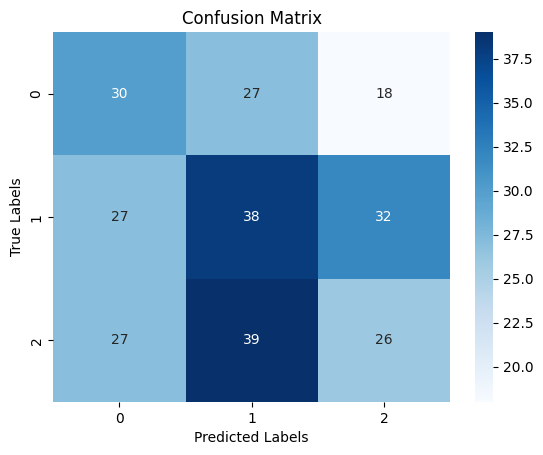

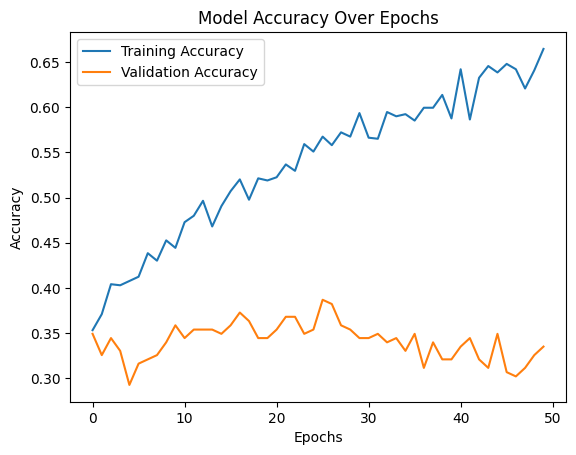

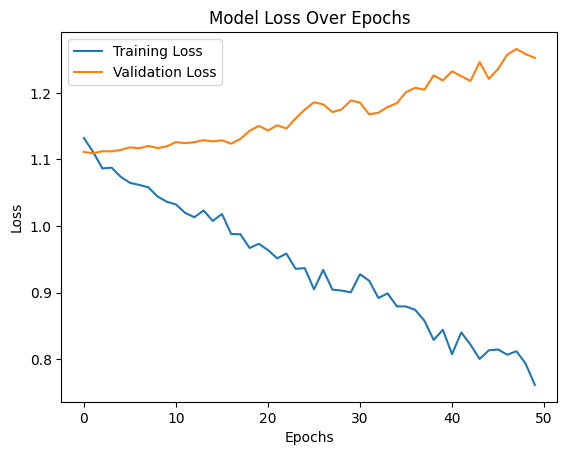

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Veri setini yükle
# Datasetiniz zaten df olarak yüklenmiş durumda
# df, önceki işlemlerle hazırlandığını varsayıyoruz

# Hedef ve özellikleri ayır
X = df.drop('User Type', axis=1)
y = df['User Type']

# Hedefi encode et
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Veriyi eğitim ve test olarak böl
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Özellikleri normalize et
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Derin öğrenme modelini oluştur
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(len(np.unique(y_encoded)), activation='softmax')  # Çok sınıflı çıktı için softmax kullanılır
])

# Modeli derle
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Modeli eğit
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

# Modeli değerlendirme
train_loss, train_accuracy = model.evaluate(X_train, y_train, verbose=0)
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)

print(f'Training Accuracy: {train_accuracy:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')

# Sınıflandırma raporu
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

print("Classification Report:")
print(classification_report(y_test, y_pred_classes, target_names=list(label_encoder.classes_.astype(str))))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_classes)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Eğitim süreci görselleştirme
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy Over Epochs')
plt.show()

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Model Loss Over Epochs')
plt.show()


In [ ]:
import numpy as np
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Veriyi eğitim ve test seti olarak bölme
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# SMOTE uygulama
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Özellikleri ölçeklendirme
scaler = StandardScaler()
X_train_smote = scaler.fit_transform(X_train_smote)
X_test = scaler.transform(X_test)

# Modeli oluşturma
model = Sequential([
    Dense(64, activation='relu', input_dim=X_train_smote.shape[1]),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Modeli derleme
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Modeli eğitme
model.fit(X_train_smote, y_train_smote, epochs=50, batch_size=32, validation_split=0.1)

# Model performansını değerlendirme
_, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy:.2f}')

Epoch 1/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 91ms/step - accuracy: 0.3622 - loss: 0.6327 - val_accuracy: 0.1316 - val_loss: 0.3464
Epoch 2/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.3623 - loss: 0.2690 - val_accuracy: 0.1316 - val_loss: 0.2411
Epoch 3/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3336 - loss: 0.0183 - val_accuracy: 0.1316 - val_loss: 0.1903
Epoch 4/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3617 - loss: 0.0045 - val_accuracy: 0.1316 - val_loss: 0.1558
Epoch 5/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3743 - loss: -0.0416 - val_accuracy: 0.1316 - val_loss: 0.1522
Epoch 6/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3833 - loss: -0.2514 - val_accuracy: 0.1316 - val_loss: 0.1287
Epoch 7/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3727 - loss: -0.0054 - val_accuracy: 0.1316 - val_loss: 0.1200
Epoch 8/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3478 - loss: -0.2362 - val_accuracy: 0.1316 - val_

Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 12s 151ms/step - accuracy: 0.3101 - loss: 1.3535 - val_accuracy: 0.3246 - val_loss: 1.0918 - learning_rate: 0.0010
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.3966 - loss: 1.1902 - val_accuracy: 0.5088 - val_loss: 1.0274 - learning_rate: 0.0010
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4585 - loss: 1.0793 - val_accuracy: 0.5789 - val_loss: 1.0206 - learning_rate: 0.0010
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4743 - loss: 1.0477 - val_accuracy: 0.4825 - val_loss: 1.0195 - learning_rate: 0.0010
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4627 - loss: 1.0495 - val_accuracy: 0.4912 - val_loss: 1.0009 - learning_rate: 0.0010
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4904 - loss: 1.0275 - val_accuracy: 0.5088 - val_loss: 0.9592 - learning_rate: 0.0010
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4860 - loss: 1.0208 - val_

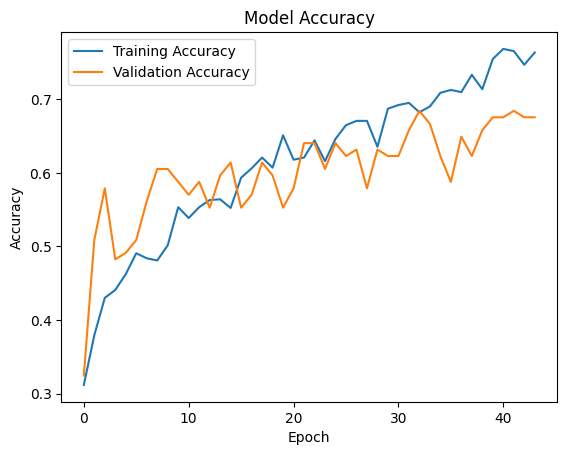

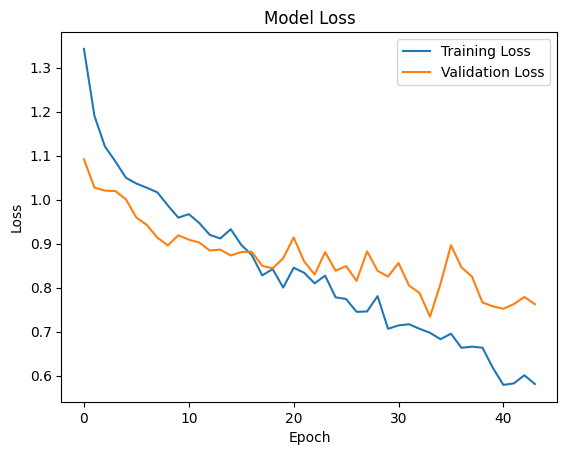

In [ ]:
import numpy as np
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Veriyi eğitim ve test seti olarak bölme
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# SMOTE uygulama
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Özellikleri ölçeklendirme
scaler = StandardScaler()
X_train_smote = scaler.fit_transform(X_train_smote)
X_test = scaler.transform(X_test)

# Modeli oluşturma
model = Sequential([
    Dense(512, input_dim=X_train_smote.shape[1]),
    BatchNormalization(),
    Activation('relu'),
    Dropout(0.3),
    Dense(256),
    BatchNormalization(),
    Activation('relu'),
    Dropout(0.3),
    Dense(128),
    BatchNormalization(),
    Activation('relu'),
    Dropout(0.2),
    Dense(len(np.unique(y)), activation='softmax')  # Çok sınıflı çıktı için softmax kullanılır
])

# Modeli derleme
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Eğitim sürecini düzenleme
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.0001)

# Modeli eğitme
history = model.fit(X_train_smote, y_train_smote, epochs=100, batch_size=32, validation_split=0.1, callbacks=[early_stopping, reduce_lr], verbose=1)

# Model performansını değerlendirme
_, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy:.2f}')

# Eğitim sürecini görselleştirme
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()


In [ ]:
!pip install keras-tuner -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 3.7 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import f1_score, classification_report
import kerastuner as kt
import seaborn as sns
import matplotlib.pyplot as plt


# Hedef ve özellikleri ayır
X = df.drop('User Type', axis=1)
y = df['User Type']

# Hedefi encode et
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Veriyi eğitim ve test olarak böl
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Özellikleri normalize et
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Hiperparametre optimizasyonu için model tanımı
def build_model(hp):
    model = Sequential()
    model.add(Dense(hp.Int('units', min_value=32, max_value=512, step=32), activation='relu', input_shape=(X_train.shape[1],)))
    model.add(Dropout(hp.Float('dropout', min_value=0.0, max_value=0.5, step=0.1)))
    for i in range(hp.Int('layers', 1, 3)):
        model.add(Dense(hp.Int(f'layer_{i}_units', 32, 256, step=32), activation='relu'))
        model.add(Dropout(hp.Float(f'layer_{i}_dropout', 0.0, 0.5, step=0.1)))
    model.add(Dense(len(np.unique(y_encoded)), activation='softmax'))

    model.compile(optimizer=Adam(hp.Float('learning_rate', 1e-4, 1e-2, sampling='log')),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Keras Tuner'ı başlat
tuner = kt.Hyperband(build_model,
                     objective='val_accuracy',
                     max_epochs=10,
                     directory='my_dir',
                     project_name='keras_tuner_demo')

# Callback'leri tanımla
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

# Hiperparametre aramasını başlat
tuner.search(X_train, y_train, epochs=50, validation_split=0.2, callbacks=[stop_early])

# En iyi hiperparametreleri al
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

# En iyi modeli al ve eğit
model = tuner.hypermodel.build(best_hps)
history = model.fit(X_train, y_train, epochs=50, validation_split=0.2)

# Modeli test setinde değerlendir
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=2)
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Performans ölçümü
print(f'Test Accuracy: {test_accuracy:.4f}')
print("Classification Report:")
print(classification_report(y_test, y_pred_classes, target_names=label_encoder.classes_))

# F1 Score
f1 = f1_score(y_test, y_pred_classes, average='weighted')
print(f'F1 Score: {f1:.4f}')

# Eğitim sürecini görselleştirme
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy Over Epochs')
plt.show()


Trial 30 Complete [00h 00m 14s]
val_accuracy: 0.35849055647850037

Best val_accuracy So Far: 0.40566039085388184
Total elapsed time: 00h 05m 27s
Epoch 1/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 7s 138ms/step - accuracy: 0.3407 - loss: 1.1017 - val_accuracy: 0.3538 - val_loss: 1.0996
Epoch 2/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3611 - loss: 1.0881 - val_accuracy: 0.3349 - val_loss: 1.1013
Epoch 3/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4099 - loss: 1.0797 - val_accuracy: 0.3726 - val_loss: 1.0999
Epoch 4/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4384 - loss: 1.0611 - val_accuracy: 0.3632 - val_loss: 1.1010
Epoch 5/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4602 - loss: 1.0624 - val_accuracy: 0.3726 - val_loss: 1.0998
Epoch 6/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4950 - loss: 1.0364 - val_accuracy: 0.3585 - val_loss: 1.1024
Epoch 7/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5272 - loss: 1.0301 - val_accurac

TypeError: object of type 'numpy.int64' has no len()

In [ ]:
import pandas as pd

# Try to read the JSON file assuming it's in 'records' orientation or 'JSON lines' format
try:
    json_df = pd.read_json('/content/drive/MyDrive/Article_EV/acndata_sessions.json', lines=True)
except ValueError:
    try:
        json_df = pd.read_json('/content/drive/MyDrive/Article_EV/acndata_sessions.json', orient='records')
    except ValueError:
        print("The JSON file is not in a valid format or is empty.")
        # Handle the error, e.g., exit the script or skip this file
        json_df = pd.DataFrame()  # Assign an empty DataFrame to json_df

# Now you can work with the 'json_df' DataFrame
print(json_df.head())

The JSON file is not in a valid format or is empty.
Empty DataFrame
Columns: []
Index: []
